In [1]:
import torch
from repop import dataset,params2theta,theta2params,plot_sci_not
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

In [2]:
def load_dataset(filename,Nmax=10**10,remove_zeros=True,threshold=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,threshold)

In [3]:
case = cases.casem1
#case = cases.casem2
th_gt = params2theta(*torch.tensor((case.mus,case.sigs,case.rhos)))

/tmp/ipykernel_11793/2974789104.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789143830/work/torch/csrc/utils/tensor_new.cpp:278.)
  th_gt = params2theta(*torch.tensor((case.mus,case.sigs,case.rhos)))


25
15
10
5


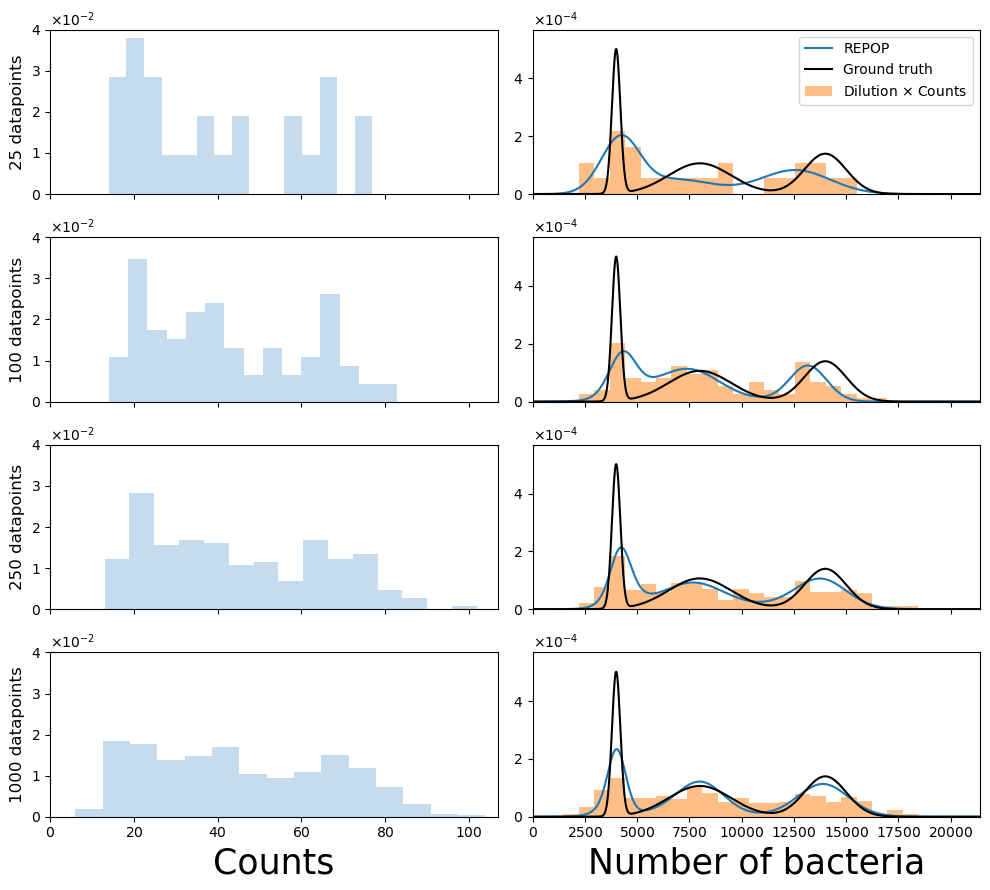

In [4]:
fig,axs = plt.subplots(4,2,figsize=(10,3*3),sharex='col',sharey='col') 

first = True
for Nmax, axi in zip(reversed((25, 100, 250, 1000)), reversed(axs)):

    data2 = load_dataset('synth_data/synth_{}.csv'.format(case.name),Nmax=Nmax,threshold=-1)    
    data2.evaluate(observe=False)
    #print(data2.ev)
    if first:
      cmax = data2.counts.max().item()+3
      bins = torch.linspace(0,cmax,30).numpy()
      dil = data2.dils[0].item()
      first = False      
    
    data2.real_plots(axi[1],th_gt,bins=bins*dil)
    data2.dil_hist(axi[0])
    axi[0].set_ylabel('{} datapoints'.format(Nmax),fontsize=12)
    axi[0].set_xlabel('')
    
    del data2.lpkdil_n
    del data2

ticks = torch.arange(0,cmax+49,50).numpy()

axs[-1][0].set_xlabel('Counts',fontsize=25)
axs[-1][1].set_xlabel('Number of bacteria',fontsize=25)
axi[0].set_xlim((0,cmax)), axi[1].set_xlim((0,cmax*dil))
axs[0][1].legend()


ymax = axs[-1][0].get_ylim()[-1], 1/2.2*(case.rhos/case.sigs).max()
[(axi[0].set_ylim((0,ymax[0])), axi[1].set_ylim((0,ymax[1])), plot_sci_not(axi[0]), plot_sci_not(axi[1])) for axi in axs]

plt.tight_layout()
fig.savefig('graphs/synth/{}_all.png'.format(case.name),dpi=900)

In [5]:
data2 = load_dataset('synth_data/synth_{}.csv'.format(case.name),Nmax=Nmax,threshold=-1)
    